In [13]:
import sys
sys.path.append('../')

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import save_scores_csv, show_test_images, taus

In [14]:
image_dir = '/storage/annajiwons/images'
merfish_dir = f'{image_dir}/merfish'
smfish_dir = f'{image_dir}/smfish'

model_dir = './models'

In [15]:
# 8 images (20%) chosen for test
X_test_names = sorted(glob(f'{smfish_dir}/test/*.tif'))
X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, X_test_names))]
Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
Y_test = list(map(io.imread, Y_test_names))

In [16]:
# Load from disk
readout_probe_model = StarDist2D(None, name='readout_probe_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.778672, nms_thresh=0.3.


In [17]:
Y_pred = [readout_probe_model.predict_instances(x, n_tiles=readout_probe_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(X_test)]

100%|██████████| 8/8 [02:05<00:00, 15.72s/it]


In [18]:
Y_pred_labels = [pred[0] for pred in Y_pred]
stats = [matching_dataset(Y_test, Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:17<00:00,  1.91s/it]


In [19]:
stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=6, tp=34, fn=9, precision=0.85, recall=0.7906976744186046, accuracy=0.6938775510204082, f1=0.8192771084337349, n_true=43, n_pred=40, mean_true_score=0.45175992270972254, mean_matched_score=0.5713434316622962, panoptic_quality=0.4680885946148932, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=6, tp=34, fn=9, precision=0.85, recall=0.7906976744186046, accuracy=0.6938775510204082, f1=0.8192771084337349, n_true=43, n_pred=40, mean_true_score=0.45175992270972254, mean_matched_score=0.5713434316622962, panoptic_quality=0.4680885946148932, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=8, tp=32, fn=11, precision=0.8, recall=0.7441860465116279, accuracy=0.6274509803921569, f1=0.7710843373493976, n_true=43, n_pred=40, mean_true_score=0.4399764781474993, mean_matched_score=0.5912183925107022, panoptic_quality=0.45587924241789085, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=14, tp=26, fn=1

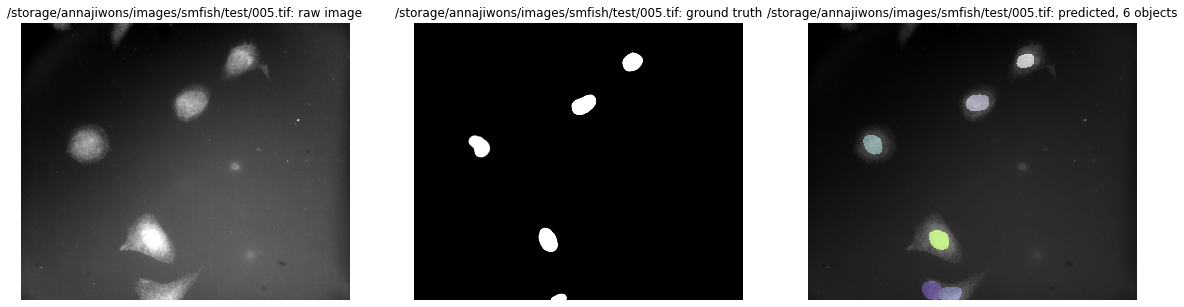

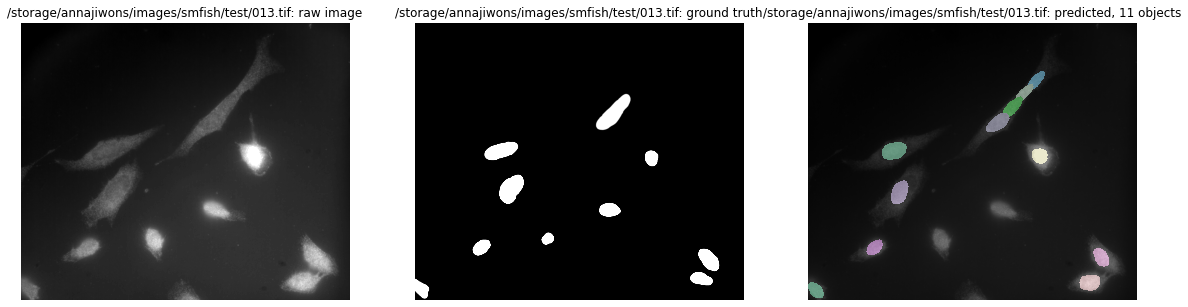

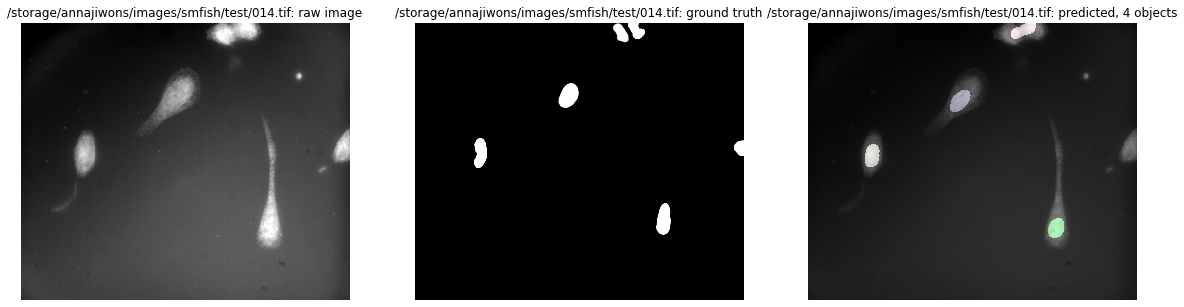

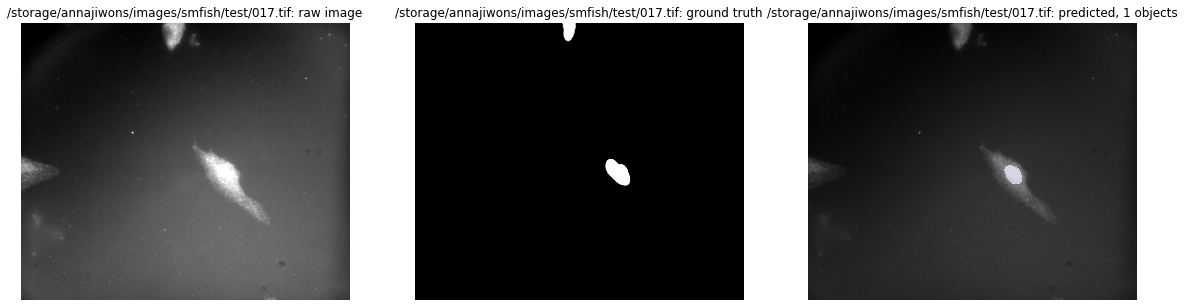

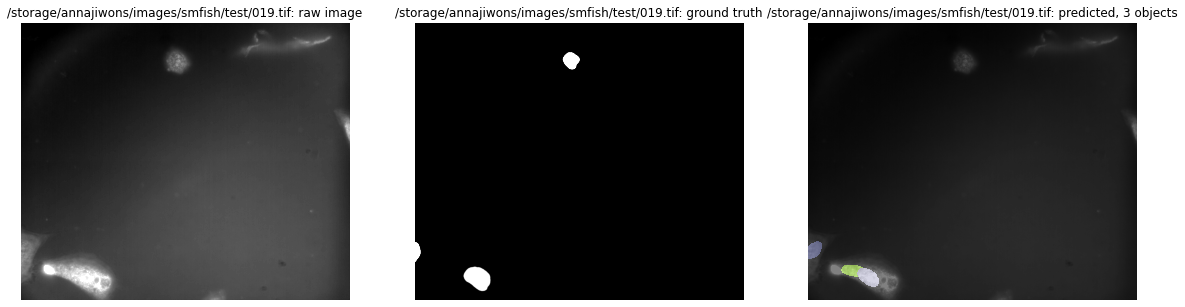

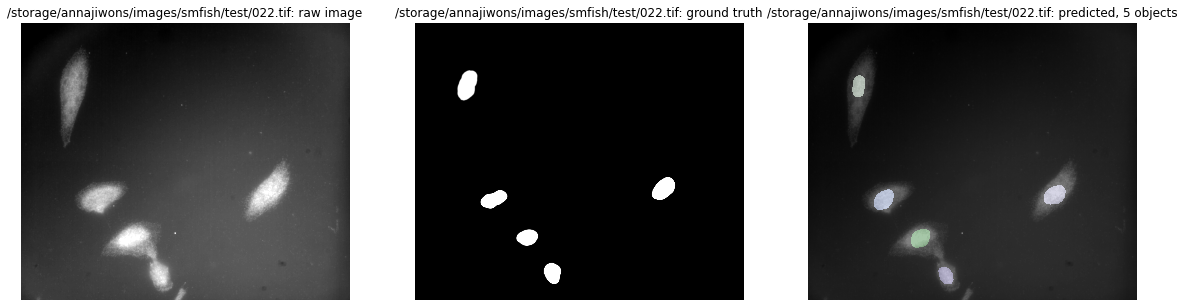

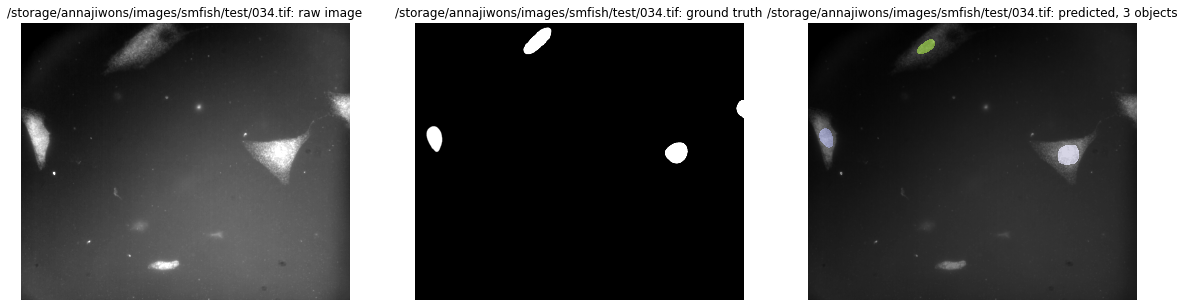

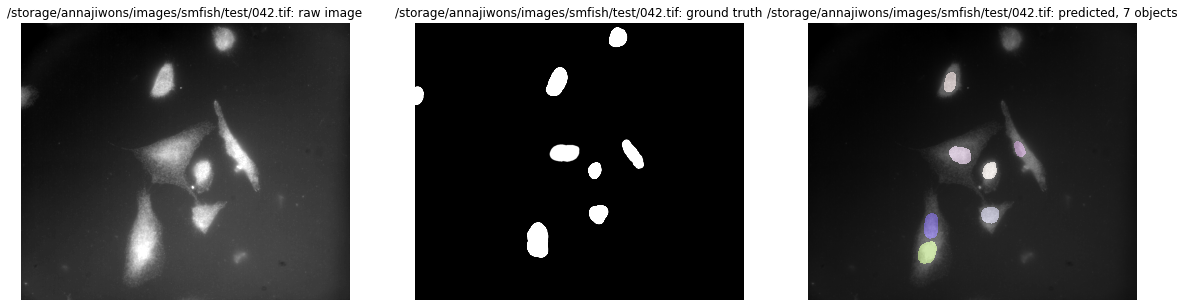

In [20]:
show_test_images(X_test, Y_test, Y_pred, X_test_names)

In [21]:
save_scores_csv(stats)

In [22]:
cv.imwrite('model10.tif', Y_pred[1][0])

True